Assignment: PCA Implementation
Objective:
- The objective of this assignment is to implement PCA on a given dataset and analyse the results.


Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [108]:
# Download the wine dataset from the UCI Machine Learning Repository
# (https://archive.ics.uci.edu/ml/datasets/Wine).
# Load the dataset into a Pandas dataframe.

import pandas as pd

df=pd.read_csv("wine/wine.data",header=None,names=['target','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline'])
df.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [109]:
# Split the dataset into features and target variables.
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [110]:
# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) 
# as necessary.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [111]:
# Implement PCA on the preprocessed dataset using the scikit-learn library.

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(X)
X[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [112]:
# Determine the optimal number of principal components to retain based on the explained variance
#  ratio.

# The optimal number of principal components to retain based on the explained variance ratio is 
# typically determined by finding the point at which adding more principal components doesn't 
# significantly increase the explained variance. This point is often referred to as the "elbow" 
# point in a scree plot. Alternatively, you can choose a specific explained variance threshold 
# (e.g., 95% of the total variance) and select the number of principal components that achieves 
# or exceeds that threshold in a cumulative explained variance plot.

print('components:',pca.components_)
print('pca variance ratio :',pca.explained_variance_ratio_)

components: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]
pca variance ratio : [0.36198848 0.1920749 ]


<Axes: >

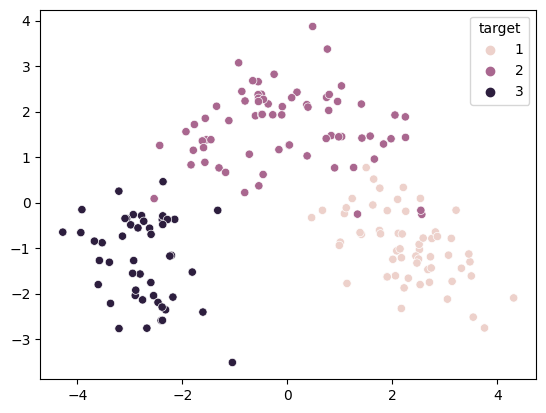

In [113]:
# Visualise the results of PCA using a scatter plot.

import seaborn as sns

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

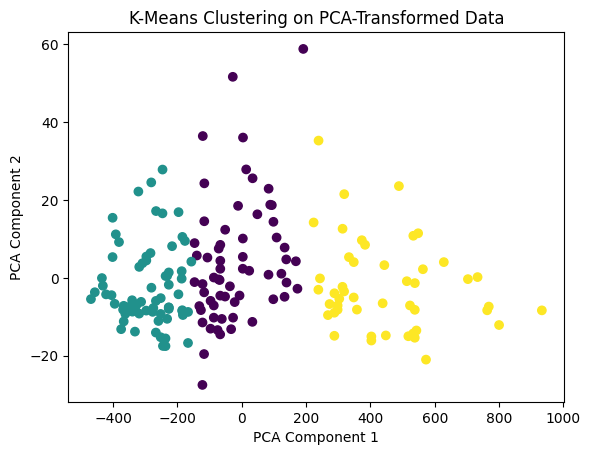

In [114]:
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

from sklearn.cluster import KMeans

X=df.iloc[:,1:]
n_components = 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 2: Apply K-Means clustering to the transformed data
n_clusters = 3  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)

# Step 3: Visualize the clusters (optional)
# If you reduced to 2 components, you can visualize the clusters
if n_components == 3:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('K-Means Clustering on PCA-Transformed Data')
    plt.show()

# Step 4: Access cluster labels for each data point
cluster_labels = kmeans.labels_


In [105]:
# Interpret the results of PCA and clustering analysis.


# when we increase n_components, increase accuracy of model so PCA but at some point its decrease accuracy of model
# using pca, we can see 2-D scatter plot as above  and its easily oberable. All three cluster are easily grouped.